In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cyl_even_network import CylEvenNetwork

In [3]:
K_A_MAX = 12000
K_E_MAX = 2000

## hypostomal half

In [4]:
ntwk = CylEvenNetwork(num_lon=5,
                      num_cir=20,
                      gc=700,
                      tmax=3000,
                      pacemakers=range(100),
                      wnoise=0,
                      prob_lon=1,
                      prob_cir=.2,
                      seed=1)

In [5]:
# set longitudinal gradient sensitivity 
for i, neuron in enumerate(ntwk.neurons):
    (phi, z) = ntwk.locations[i]
    neuron.k_a = (K_A_MAX + neuron.k_a) / 2 - ((K_A_MAX + neuron.k_a) / 2 - neuron.k_a) * z
    neuron.k_e = (K_E_MAX + neuron.k_e) / 2 - ((K_E_MAX + neuron.k_e) / 2 - neuron.k_e) * z

In [6]:
ntwk.neurons[0].k_a

5150.0

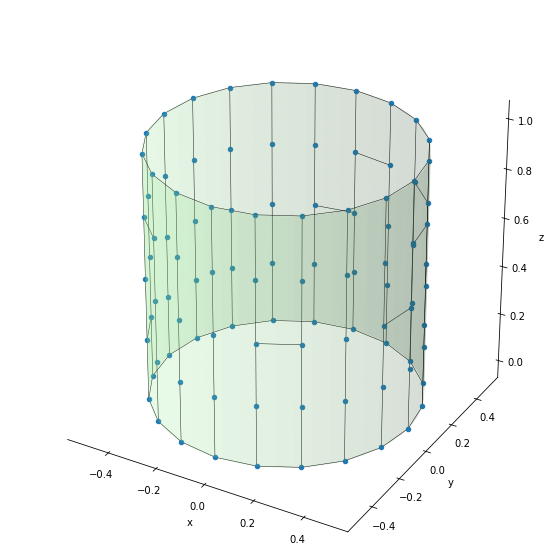

In [7]:
%matplotlib inline
ntwk.disp_network(figsize=(10, 10), show_pm=False)

In [8]:
ntwk.run()

100%|███████████████████████████████████████| 299999/299999 [03:28<00:00, 1441.22it/s]


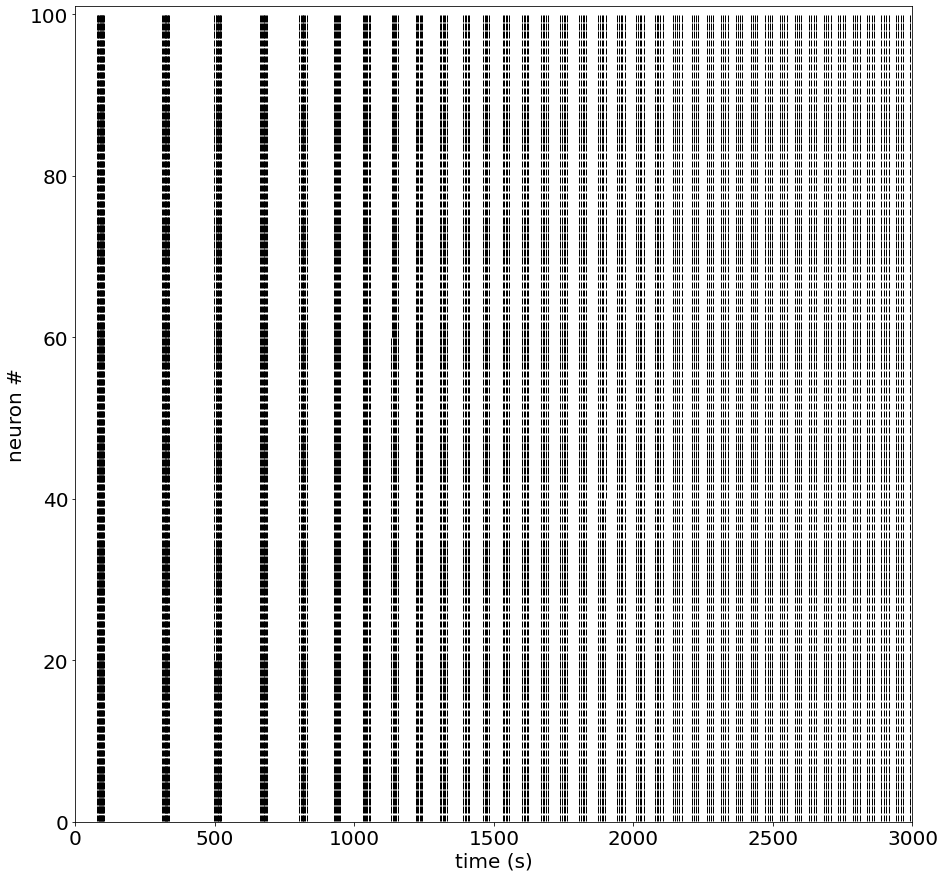

In [14]:
%matplotlib inline
ntwk.disp(figsize=(15, 15), style='spike')

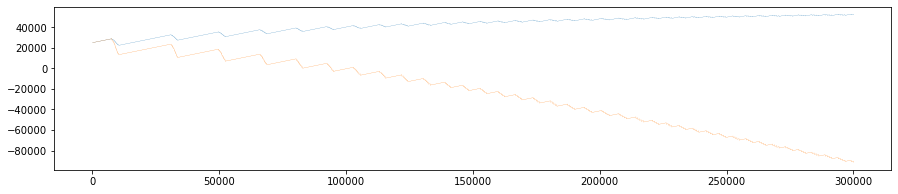

In [29]:
plt.figure(figsize=(15,3))
plt.plot(ntwk.neurons[0].sigma_w_train[:], lw=.2)
plt.plot(ntwk.neurons[99].sigma_w_train[:], lw=.2)
plt.show()

## peduncular half

In [10]:
ntwk = CylEvenNetwork(num_lon=5,
                      num_cir=20,
                      gc=700,
                      tmax=2000,
                      pacemakers=range(100),
                      wnoise=0,
                      prob_lon=1,
                      prob_cir=.2,
                      seed=1)

In [11]:
# set longitudinal gradient sensitivity 
for i, neuron in enumerate(ntwk.neurons):
    (phi, z) = ntwk.locations[i]
    neuron.k_a = (K_A_MAX + neuron.k_a) / 2 + ((K_A_MAX - neuron.k_a) / 2) * z
    neuron.k_e = (K_E_MAX + neuron.k_e) / 2 + ((K_E_MAX - neuron.k_e) / 2) * z

In [12]:
ntwk.run()

100%|███████████████████████████████████████| 199999/199999 [02:21<00:00, 1409.83it/s]


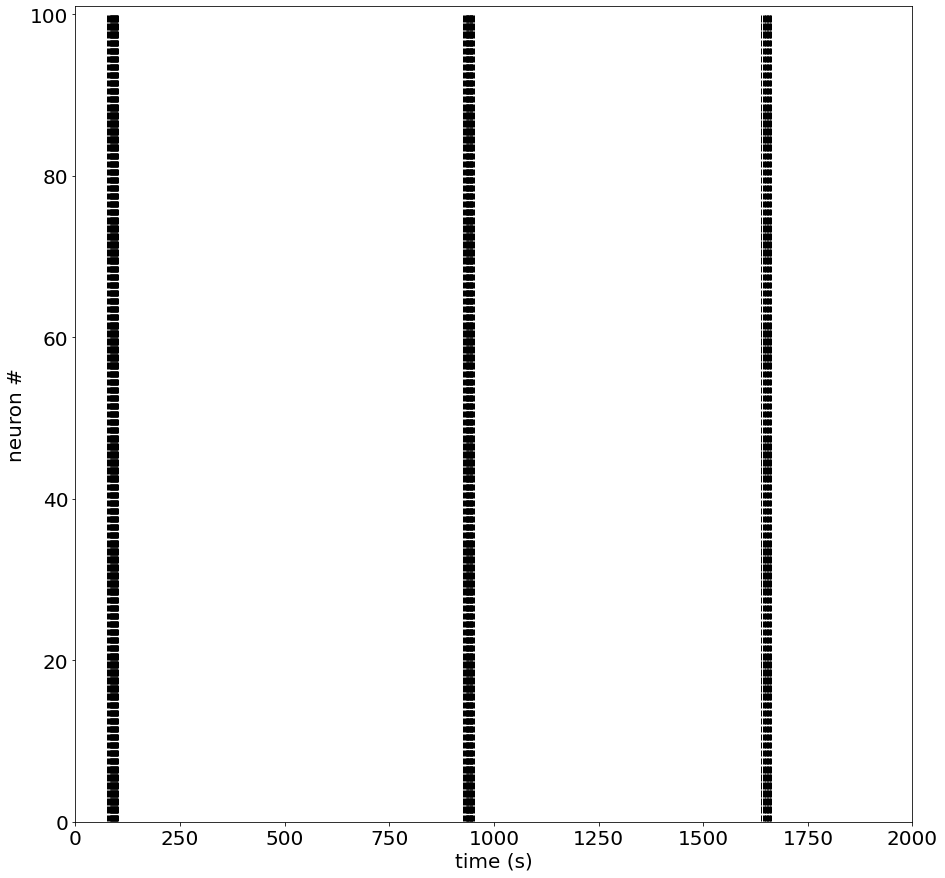

In [13]:
%matplotlib inline
ntwk.disp(figsize=(15, 15), style='spike')